# Dev IA - Evaluation n°1 - Mars 2022
Ceci est un point d'étape pour évaluer les compétences acquises à ce stade. 
  
Faites une copie de ce notebook, modifiez-le librement puis partager votre travail en fin de session sur Simplonline (veuillez vous assurer que les accès à votre document sont autorisés à des tiers).


## Objectifs
Pour toute les étapes ci-dessous il vous est demandé d'**argumenter vos choix** et d'**expliquer les résultats** obtenus.

* Réaliser une EDA (Exploratory Data Analysis) sur le jeu de données
  - Descrire les données
  - Réaliser une analyse univariée et bivariée

* Réaliser le preprocessing des données
  - Gérer les données manquantes
  - Procéder à la normalisation / encodage

* Entrainer un modèle d'apprentissage supervisé
  - Choisir un modèle répondant aux objectifs du projet
  - Définir les paramètres du modèle
  - Utiliser la validation croisée

* Evaluer le modèle
  - Choisir la ou les métriques d'erreur
  - Valider les performances obtenues

* Conclure
  - Réalisation du projet
  - Difficultés
  - Performance
  - ...


## Bonus
Pour ceux qui veulent aller plus loin, vous pouvez notamment :

* Utiliser un Pipeline
* Procéder à une recherche exhaustive des hyper-paramètres (grid search)
* Procéder à une comparaison de modèles
* Réaliser une prédiction sur des nouvelles données
* Restituer des graphiques pour améliorer la compréhension du projet
* Laisser parler votre intuition ...

## Le jeu de données
Le jeu de données est disponible ci-dessous.  
Il concerne le recensement d'animaux marins (dauphins) selon différentes caractéristiques :
* la cible à prédire est la colonne `variety`
* les features (numériques et catégorielles) sont toutes les autres colonnes :
  - `area` : zone géographique où l'animal réside
  - `dimension_1_mm` : dimension n°1 de l'animal
  - `dimension_2_mm` : dimension n°2 de l'animal
  - `dimension_3_mm` : dimension n°3 de l'animal
  - `mass_g` : masse de l'animal
  - `sex` : genre de l'animal

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from seaborn import lmplot
seaborn .set_style("white")

%matplotlib inline

#  Analyse univariée

In [6]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = pandas_profiling.ProfileReport(df)
profile.to_file("dauphins.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ce profiling, peut être trouvé dans le fichier joint dauphins.html

In [3]:
df.shape

(344, 7)

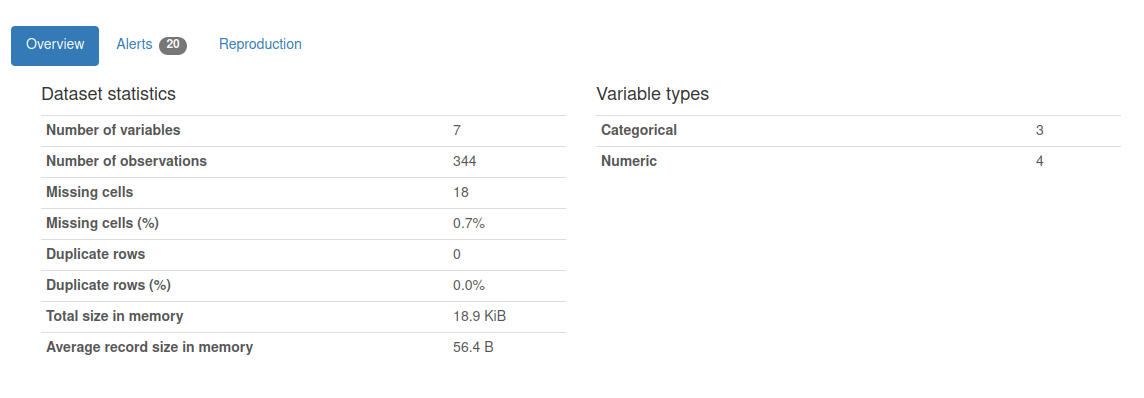

#### df avec 7 features et 344 lignes

#### il y a des données manquantes
            cela signifie qu'une décision doit être prise afin de pouvoir utiliser ces données avec un modèle de machine learning
            Je vais essayer de faire une imputation en utilisant la moyenne.

#### 3 featuers catégoriels et 4 featuers numériques.
            il est nécessaire de faire un écodage pour la cible et pour les autres features catégorielles.
        

### Cible

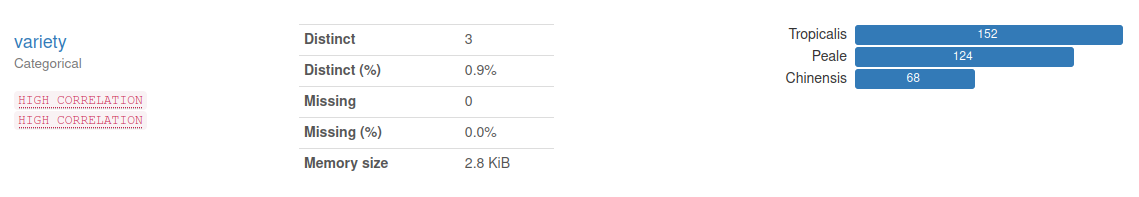

#### Il y a trois catégories dans la cible, ce qui signifie qu'il sera nécessaire d'utiliser un modèle de classification mutivarié.

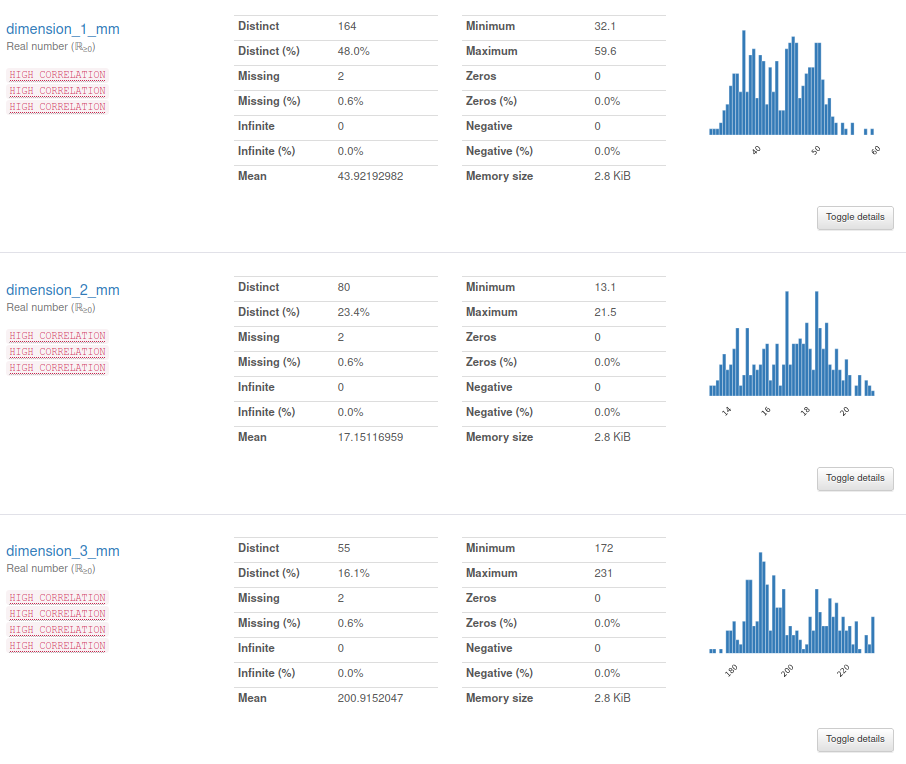

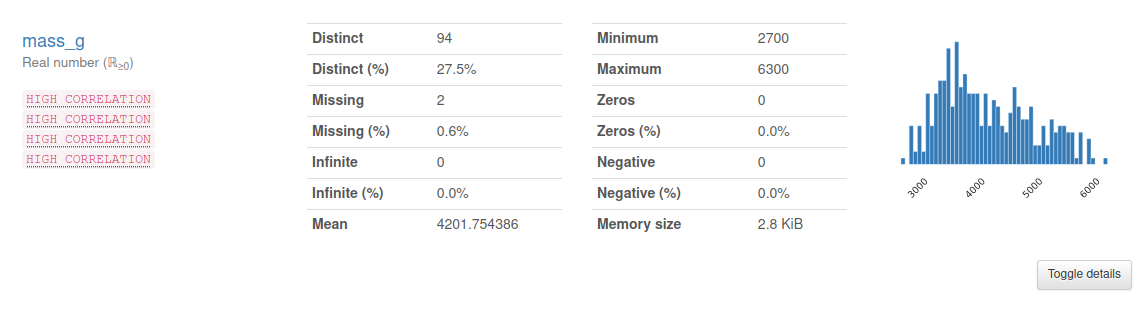

les valeurs de cette colonne mass_g sont comprises entre 2700 et 6300 ; et elles sont beaucoup plus grandes que les valeurs des autres colonnes, ce qui signifie que pour obtenir de meilleurs résultats avec le modèle de machine learning, il sera nécessaire de procéder à une normalisation.

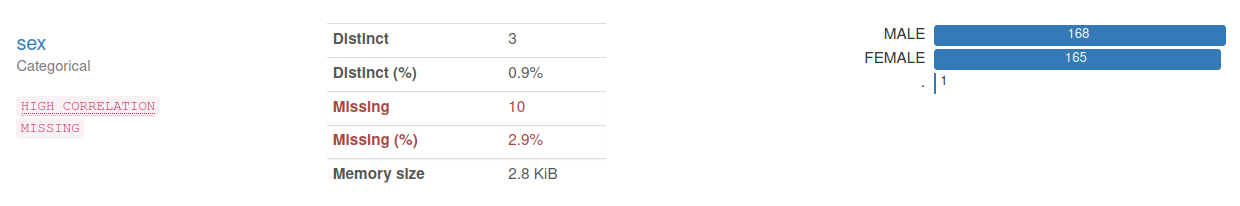

Dans la colonne sex il y a une ligne qui semble avoir une erreur, elle a un point à la place du sexe, il faut vérifier s'il serait sage de supprimer cette ligne.

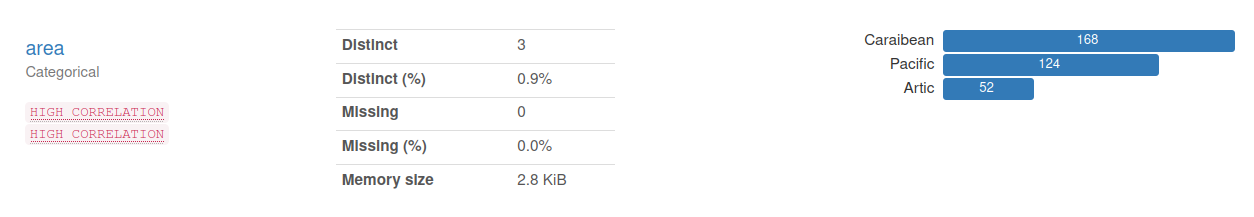

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df.describe().round(2)

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


In [11]:
df.describe(include='all').round(2)

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
count,344,344,342.00,342.00,342.00,342.00,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Tropicalis,Caraibean,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.92,17.15,200.92,4201.75,NaN
std,NaN,NaN,5.46,1.97,14.06,801.95,NaN
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN
25%,NaN,NaN,39.22,15.60,190.00,3550.00,NaN
50%,NaN,NaN,44.45,17.30,197.00,4050.00,NaN
75%,NaN,NaN,48.50,18.70,213.00,4750.00,NaN


array([[<AxesSubplot:title={'center':'dimension_1_mm'}>,
        <AxesSubplot:title={'center':'dimension_2_mm'}>],
       [<AxesSubplot:title={'center':'dimension_3_mm'}>,
        <AxesSubplot:title={'center':'mass_g'}>]], dtype=object)

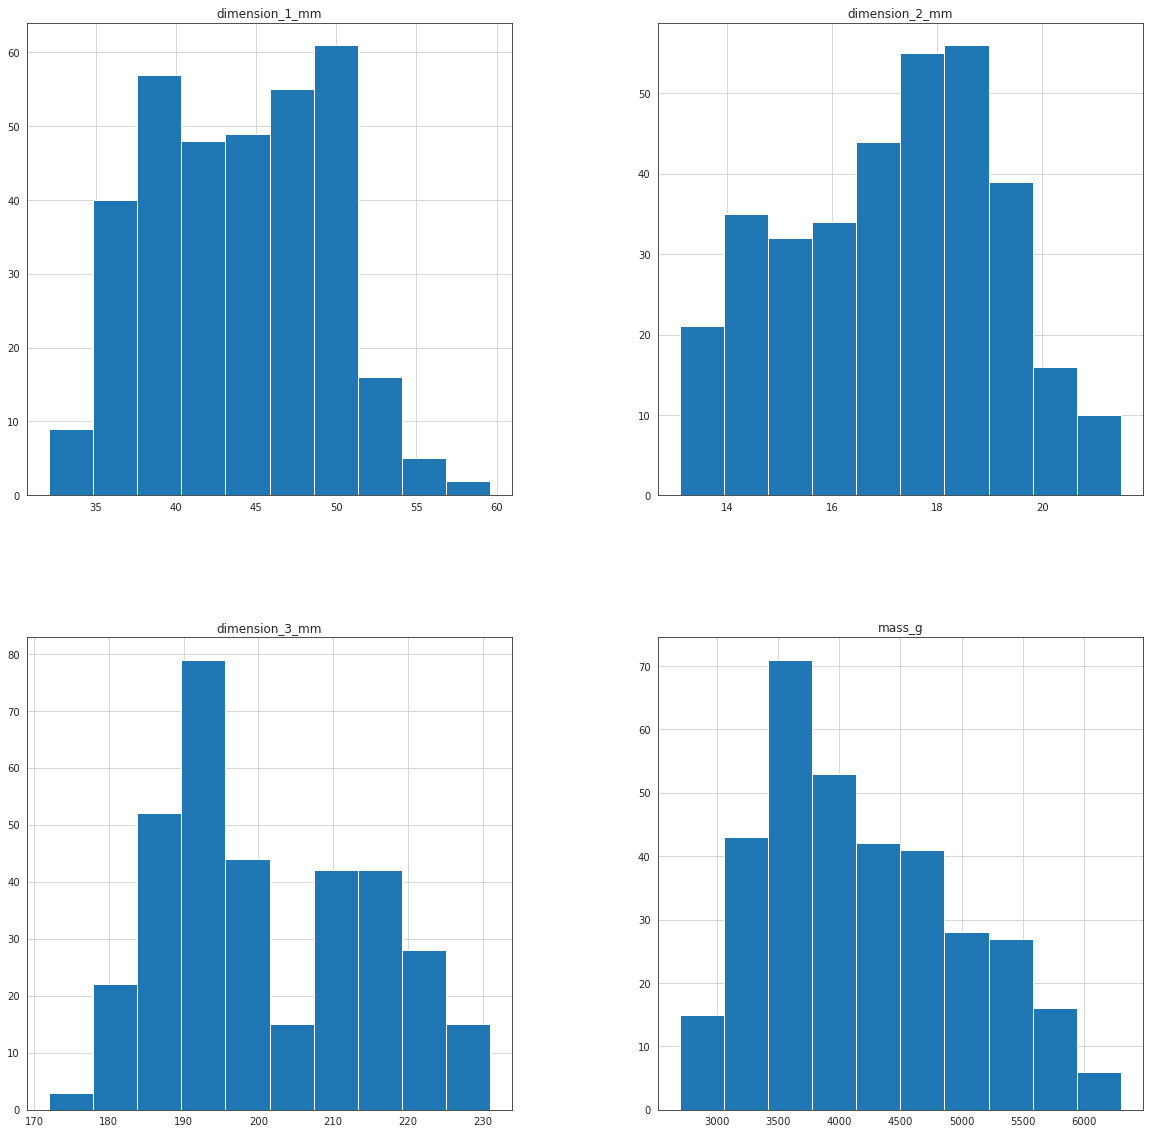

In [19]:
df.hist(figsize = (20,20))

# Analyse bivariée

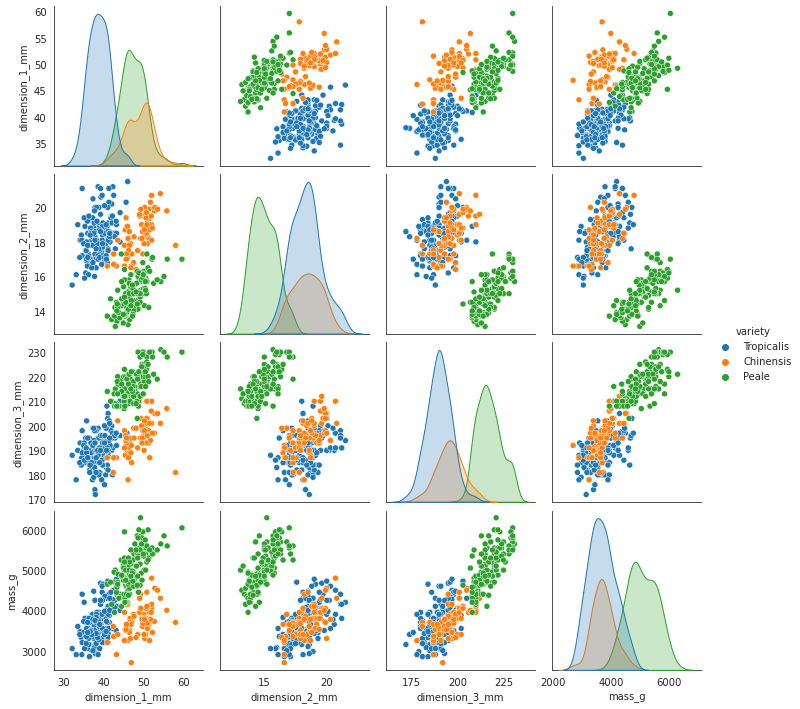

In [18]:
# Plot pair variable analysis
seaborn.pairplot(df, hue='variety')

Dans la plupart des graphiques, on peut voir que l'espèce appelée Peale a des caractéristiques distinctives et les deux autres espèces, dans certains cas, les données sont mélangées et dans d'autres, elles sont bien séparées. Si nous ne connaissions pas la variété, il est probable qu'avec clustering, nous pourrions trouver les trois clusters bien définis.

# Machine Learning

In [61]:
# graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler

# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier



# Score of models
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [30]:
data = df
data

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Peale,Caraibean,NaN,NaN,NaN,NaN,NaN
340,Peale,Caraibean,46.8,14.3,215.0,4850.0,FEMALE
341,Peale,Caraibean,50.4,15.7,222.0,5750.0,MALE
342,Peale,Caraibean,45.2,14.8,212.0,5200.0,FEMALE


In [31]:
# Chinensis = 0, Peale = 1, Tropicalis = 2

# target preprocessing
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(data['variety'])
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
# features preprocessing
X = data.drop(columns='variety')
X.head()

,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Artic,39.1,18.7,181.0,3750.0,MALE
1,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Artic,NaN,NaN,NaN,NaN,NaN
4,Artic,36.7,19.3,193.0,3450.0,FEMALE


#### Nous définirons ici comment nous traiterons les données catégorielles et numériques dans le pipeline.

Sélection de variables catégorielles


In [37]:
column_cat = X.select_dtypes(include=['object']).columns
column_cat

Index(['area', 'sex'], dtype='object')

parce que les données sont catégorielles, nous allons faire l'imputation par rapport aux valeurs les plus fréquentes et nous allons utiliser OneHotEncoder parce que les données ne sont pas ordinales.

In [38]:
transfo_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

Sélection des variables numériques

In [40]:
column_num = X.select_dtypes(exclude=['object']).columns
column_num


Index(['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g'], dtype='object')

Ici, comme les données sont numériques, nous allons faire l'imputation par rapport a le valeur moyenne de chaque colonne et pour la normalisation nous utiliserons MinMaxScaler.

In [41]:
# Numerical variables
transfo_num = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

#### Column transformer

In [42]:
preparation = ColumnTransformer(
    transformers=[
        ('data_cat', transfo_cat , column_cat),
        ('data_num', transfo_num , column_num)
    ])


### Déclaration du modèle et du pipeline final


Comme travail préliminaire, j'ai fait un analyse avec pycaret, qui a donné les résultats suivants :



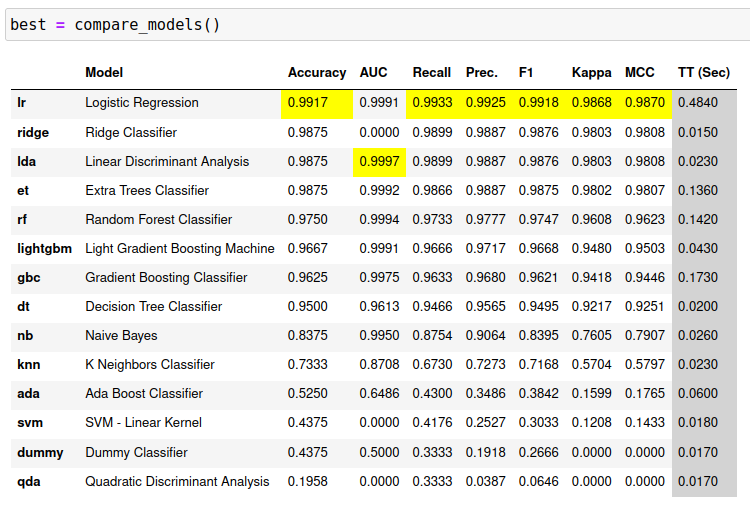

dans ce cas, nous utiliserons LogisticRegression

In [43]:
# Création du modèle : un pipeline prêt à l'emploi pour le processus ML.
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.2, multi_class='ovr', solver='saga') 
pipe_model = Pipeline(steps=[('preparation', preparation),
                        ('model',model)])
pipe_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['area', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                    

In [44]:
from sklearn import set_config
set_config(display='diagram')
pipe_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['area', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g'], dtype='object'))])),
                ('model',
                 LogisticRegression(l1_ratio=0.2, multi_class='ovr',
                                    penalty='elasticnet', solver='saga'))])

### Train test split

Ici, nous utilisons stratify parce que le nombre d'individus dans chacune des classes n'est pas égal.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)

In [51]:
y_train

array([1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2,
       2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0,
       1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2])

### Fit the model

In [52]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['area', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g'], dtype='object'))])),
                ('model',
                 LogisticRegression(l1_ratio=0.2, multi_class='ovr',
                                    penalty='elasticnet', solver='saga'))])

### Faire une prédiction pour le modèle pré-entraîné


In [53]:
y_pred = pipe_model.predict(X_test)

### Évaluation du modèle


In [55]:
# Score of models
score = accuracy_score(y_test, y_pred)
print("Accuracy :", round(score, 5))

Accuracy : 0.98837


In [66]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_clf_train = confusion_matrix(y_test, y_pred)
cm_clf_train


array([[16,  0,  1],
       [ 0, 31,  0],
       [ 0,  0, 38]])

### Essayons de faire tout cela dans une fonction.

In [59]:
'''
parameters = paramètres à évaluer dans le GridSearcCV

metric_GS = définit la métrique d'évaluation du modèle pour laquelle les hyperparamètres doivent être ajustés.
'''

def entrainement_evaluation_du_modele(data, modele_donne, parameters, metric_GS):
    
    # target preprocessing
    lb_encod = LabelEncoder()
    y = lb_encod.fit_transform(data['variety'])
    # Chinensis = 0, Peale = 1, Tropicalis = 2    
    
    # features preprocessing
    X = data.drop(columns='variety')
    X.head()    

    # Sélection de variables catégorielles
    column_cat = X.select_dtypes(include=['object']).columns
    
    transfo_cat = Pipeline(steps=[
        ('imputation', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
    ])    
    
    #Sélection des variables numériques
    column_num = X.select_dtypes(exclude=['object']).columns
    
    transfo_num = Pipeline(steps=[
        ('imputation', SimpleImputer(strategy='median')),
        ('scaling', MinMaxScaler())
    ])    
    
    # Column transformer
    preparation = ColumnTransformer(
        transformers=[
            ('data_cat', transfo_cat , column_cat),
            ('data_num', transfo_num , column_num)
        ])    

        # Division en groupes de training et d'évaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)
    
    
    # Declare model for Grid Search
    model_GS = modele_donne
    
    pipe = Pipeline(steps=[
        ('preparation', preparation),
        ('model', model_GS)]
        )
    
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
    
    # Declare the Grid Search method
    global grid
    grid = GridSearchCV(estimator = pipe, param_grid = parameters, scoring = metrics,
                        refit = metric_GS, cv = 5, n_jobs =-1, verbose = 1)

    # Fit the model
    grid.fit(X_train, y_train)

    # Evaluate cross validation performance 
    print()
    print("model: ", modele_donne)
    print("CV - Best score:", round(grid.best_score_,3))
    print("CV - best parameters:", grid.best_params_)
    #print("CV - best estimator :", grid.best_params_)
    
    # cv_results_['mean_fit_time'] donne un array avec le résultat de chaque split, 
    # cette fonction fait une moyenne de toutes ces valeurs.
    def moyennes(keys_cv):        
        a1 = grid.cv_results_[keys_cv]
        Avg_key = sum(a1) / float(len(a1))
        #print(Avg_key)
        return Avg_key
    
    # Make predictions
    y_pred = grid.predict(X_test)
    
    
    # Evaluate model performance
    print()    
    print("++ CV - mean fit time:", round(moyennes('mean_fit_time'),2), 'seg', '++')
    time = round(moyennes('mean_fit_time'),2)
    print()
    #print("CV - mean_test_accuracy:", round(moyennes('mean_test_accuracy'),3))
    print("Test Accuracy:", round(accuracy_score(y_test, y_pred),3))
    accuracy_final = round(accuracy_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_precision:", round(moyennes('mean_test_precision'),3))
    print("Test precision:", round(precision_score(y_test, y_pred),3))
    precision_final = round(precision_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_recall:", round(moyennes('mean_test_recall'),3))
    print("Test recall:", round(recall_score(y_test, y_pred),3))
    recall_final = round(recall_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_f1:", round(moyennes('mean_test_f1'),3))
    print("Test f1:", round(f1_score(y_test, y_pred),3))
    f1_final = round(f1_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_roc_auc:", round(moyennes('mean_test_roc_auc'),3))
    print("Test roc_auc:", round(roc_auc_score(y_test, y_pred),3))
    roc_auc_final = round(roc_auc_score(y_test, y_pred),3)
        
    print()
    print("classification_report:")
    print()
    print(classification_report(y_test, y_pred))
    
    
    
    
    # Matrice de confusion
    cm=confusion_matrix(y_test,y_pred)
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='',cmap="BuPu")
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # Courbe de ROC
    try:        
        # Make predictions and Courbe de ROC
        y_pred = grid.predict(X_test)
        global y_pred_proba
        y_pred_proba =grid.predict_proba(X_test)[:, 1]
        global fpr
        global tpr
        global thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

        global fig_roc
        fig_roc = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500)
        fig_roc.add_shape(
            type='line', line=dict(dash='dash'),
            x0=0, x1=1, y0=0, y1=1
        )

        fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
        fig_roc.update_xaxes(constrain='domain')       
     
    except: 
        print("Cet estimateur n'a pas la propriété predict_proba pour pouvoir calculer la courbe ROC.")    
    
    # Feature importances
    try:        
        FI = grid.best_estimator_[1].feature_importances_
        
        d_feature = {'Stats':X.columns,
             'FI':FI}
        df_feature = pd.DataFrame(d_feature)

        df_feature = df_feature.sort_values(by='FI', ascending=0)
        print(df_feature)

        fig = px.bar_polar(df_feature, r="FI", theta="Stats",
                           color="Stats", template="plotly_dark",
                           color_discrete_sequence= px.colors.sequential.Plasma_r)
        fig.show()       
     
    except:
        print()
        print('**********************************************************')
        print("Cet estimateur n'a pas la propriété de feature importances")
        print('**********************************************************')
        
       
    
    df_test_1 = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'time'])
    df_test_1[modele_donne] = (accuracy_final, precision_final, recall_final, f1_final, roc_auc_final, time)
    
    return accuracy_final, precision_final, recall_final, f1_final, roc_auc_final, time, df_test_1

In [57]:
metric_GS = 'roc_auc'

In [62]:
modele_donne = svm.SVC()
parameters = {'model__kernel':('linear', 'rbf'), 'model__C':[1, 10]}

accuracy_SVC, precision_SVC, recall_SVC, f1_SVC, roc_auc_SVC, time_SVC, df = entrainement_evaluation_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/home/cesar/anaconda3/lib/python3.9/site-packag


model:  SVC()
CV - Best score: nan
CV - best parameters: {'model__C': 1, 'model__kernel': 'linear'}

++ CV - mean fit time: 0.03 seg ++

Test Accuracy: 1.0



/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/cesar/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/home/cesar/anaconda3/lib/python3.9/site-packag

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].